In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame()

In [3]:
df['rh'] = [46,53,29,61,36,39,47,49,52,38,55,32,57,54,44]
df['mc'] = [12,15,7,17,10,11,11,12,14,9,16,8,18,14,12]

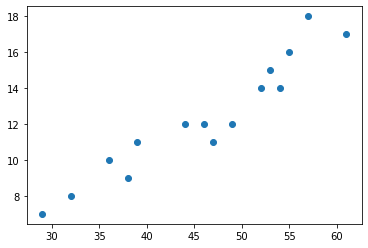

In [273]:
plt.scatter(df['rh'],df['mc'])

In [10]:
rh_mean = np.mean(df['rh'])
mc_mean = np.mean(df['mc'])

In [38]:
numer = ((df['rh'].apply(lambda x: (x-rh_mean)))*(df['mc'].apply(lambda x:(x-mc_mean)))).sum()
denum = df['rh'].apply(lambda x:(x-rh_mean)**2).sum()

In [39]:
slope = numer/denum
slope

0.3232035618140402

In [41]:
intrcpt =mc_mean-(slope*rh_mean)
intrcpt

-2.5104576516877213

In [43]:
rline = pd.DataFrame()
rline['x'] = df['rh']

In [44]:
rline['y'] = rline['x'].apply(lambda x: (intrcpt+(slope*x)))

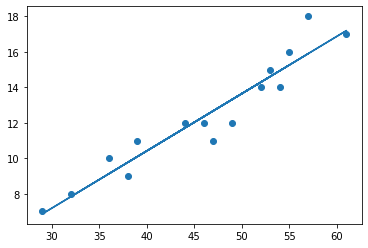

Slope is 0.32
YIntercept is -2.51
Equation of line Y =0.32x -2.51


In [64]:
plt.scatter(df['rh'],df['mc'])
plt.plot(rline['x'],rline['y'])
plt.show()
print("Slope is {}".format(np.around((slope),decimals=2)))
print("YIntercept is {}".format(np.around((intrcpt),decimals=2)))
print("Equation of line Y ={}x {}".format(np.around((slope),decimals=2),np.around((intrcpt),decimals=2)))

In [68]:
xsqm = np.around(np.mean(df['rh'].apply(lambda x:x**2)),decimals=2)

In [71]:
ysqm = np.around(np.mean(df['mc'].apply(lambda x: x **2)),decimals=2)

In [73]:
xym = np.mean(df['rh'].apply(lambda x: x)*df['mc'].apply(lambda x:x))

In [249]:
surf = pd.DataFrame()
print(slope)
print(intrcpt)

0.3232035618140402
-2.5104576516877213


In [262]:
surf['intrcpt']= np.linspace(3,-3,1000)

In [263]:
surf['slpe'] = np.linspace(0.05,0.5,1000)

In [264]:
def se(m,b,ysqm,xsqm,rh_mean,mc_mean,xym):
    
    return np.around(ysqm + m ** 2 *xsqm + b ** 2 + 2 * m * b * rh_mean - 2 * m * xym - 2 * b * mc_mean,decimals=2)

###### Above Formula comes from taking the squared sum and solving 

$SSe= \bar{y^2}+ m^2\bar{x^2}+b^2+2mb\bar{x}-2m\bar{xy}-2b\bar{y}$

In [269]:
surf['se'] = 0

In [270]:
for i in range(len(surf)):
    surf['se'][i] = se(surf['intrcpt'][i],surf['slpe'][i],ysqm,xsqm,rh_mean,mc_mean,xym)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
import plotly.graph_objects as go

In [255]:
surf.shape

(1000, 3)

In [272]:
z = surf.values
#sh_0,sh_1= z.shape
x,y = surf['slpe'],surf['intrcpt']
#x,y = np.linspace(0,1,sh_0),np.linspace(0,1,sh_0)
fig = go.Figure(data=[go.Surface(z=z,x=x,y=y)])
fig.update_layout(title="linear Regression", autosize=False,width=500,height=500)
fig.show()